# Chapter 3:

> `Regression` is used for `predicting values`
> `Classification` is used for `predicting classes`


> There are two main types of classification problems:
>* **Binary or binomial classification:** exactly two classes to choose between (usually 0 and 1, true and false, or positive and negative)
>* **Multiclass or multinomial classification:** three or more classes of the outputs to choose from


____________________________________
> ## [Logistic Regression:](https://realpython.com/logistic-regression-python/)
>`Logistic regression` is a fundamental classification technique. It belongs to the group of [**linear classifiers**](https://en.wikipedia.org/wiki/Linear_classifier)


> `Logistic regression` function is:
p(x) = 1 / (1 + exp( - f(x) ))
where f(x) is called the [logit](https://en.wikipedia.org/wiki/Logit):
>* 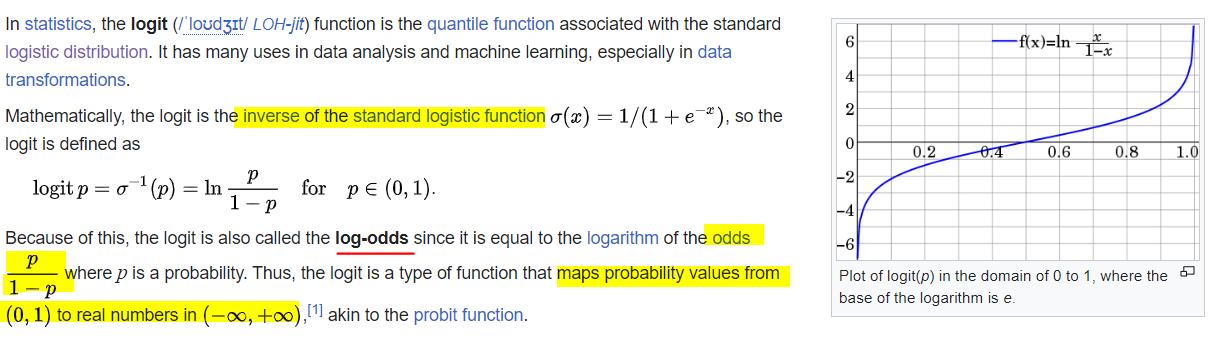

> To evaluate your `Logistic Regression Algorithm`:
>* **Log-Loss (Binary Cross-Entropy)** function is the `-ve` of **Log-Likelehood** function therefore:
>* We try to **maxmize** the the Log-Likelehood function but **minimize** log-loss function:  
_________________________________________

>* 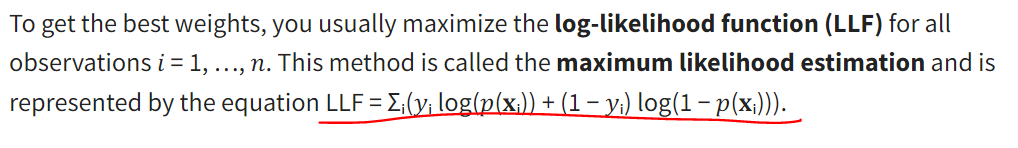
_________________________________________
>* 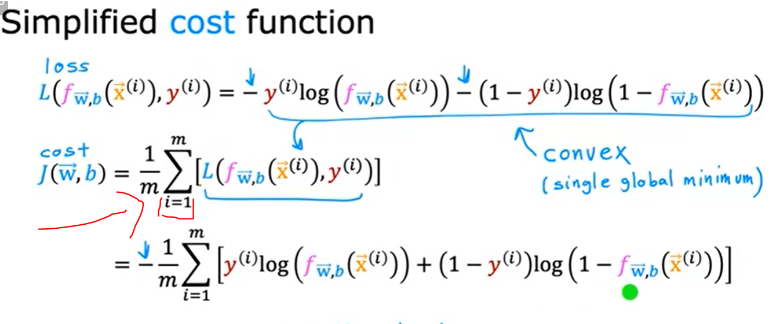
__________________________________________
>* The following graph is of log-likelehood not log-loss **we try to maximize the value of log "search for the larger value of y and move along x-axis in its direction"**
>* When y=0, we want log = 0 at p(x)=0 "no error between actual y and predicted p(x)" (so we moved left to maimize the log from -ve value to zero)
>* When y=1, we want log = 0 at p(x)=1 "no error between actual y and predicted p(x)" (so we moved right to maimize the log from -ve value to zero)
>* 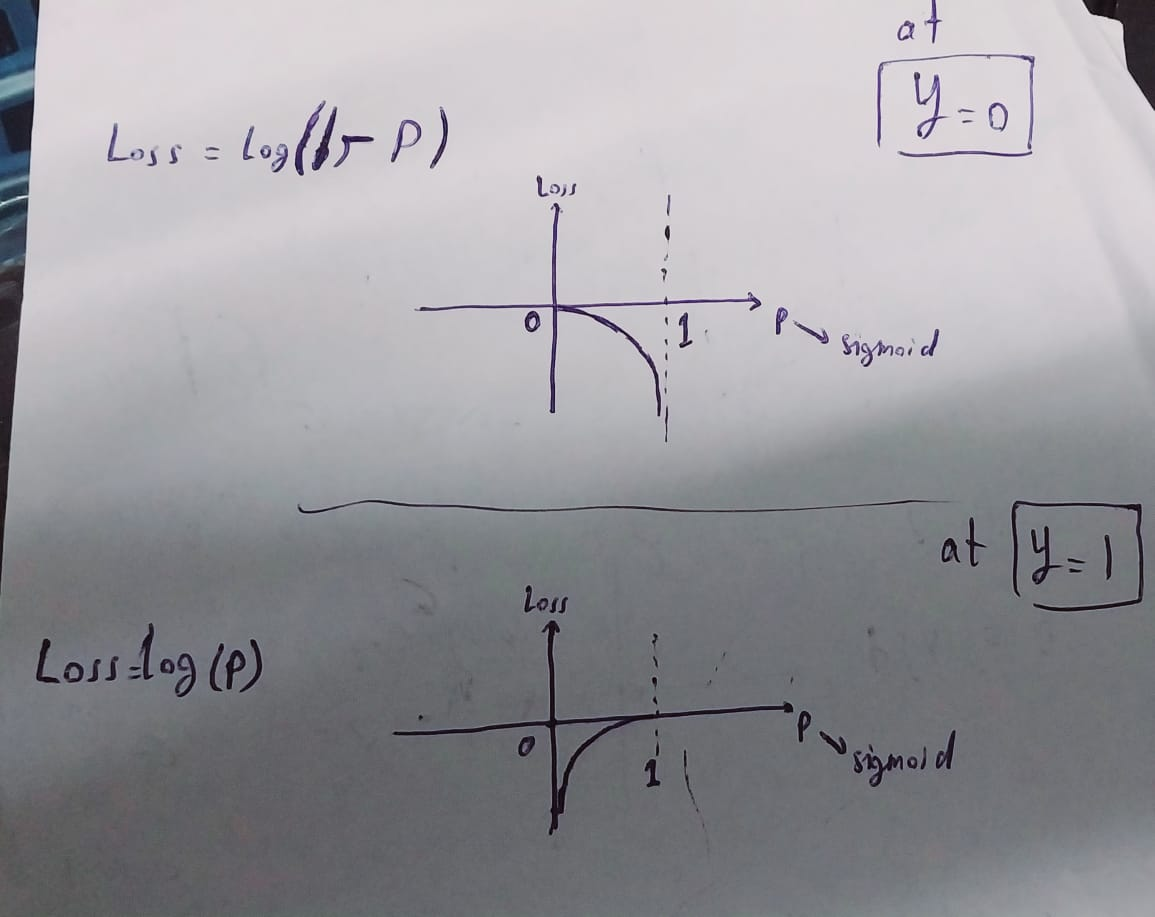


>* This is the reason why we don't use MeanSqareError cost function:
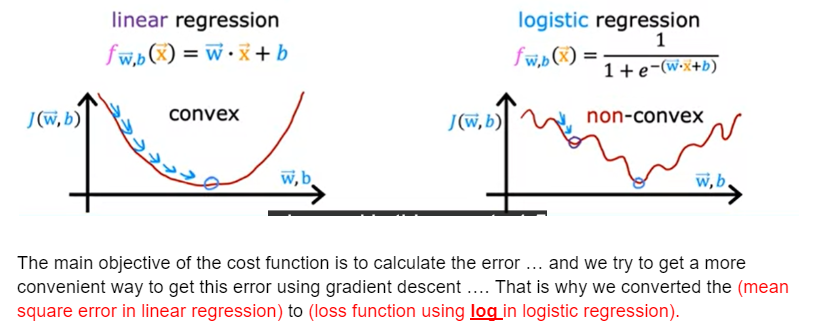


>* Difference between **`Likelehood`** and **`Probability`** is that:
>>* In `probability`, *we have a distribution* for our variable and we want to know the probability of our variable occurs at certain value in this distribution.
>>* In `likelehood`, we *don't have the distribution* ... instead we have many values for our variable and we want the probability of that our variable follows certain distribution among different distributions. (NOT Sure)

>* To handle `Overfitting`, you can either increase your data or do `regularization` There are three types:
|A|B|C|
|-|-|-|
|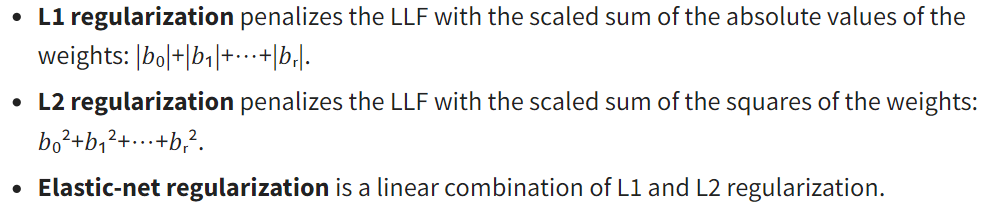|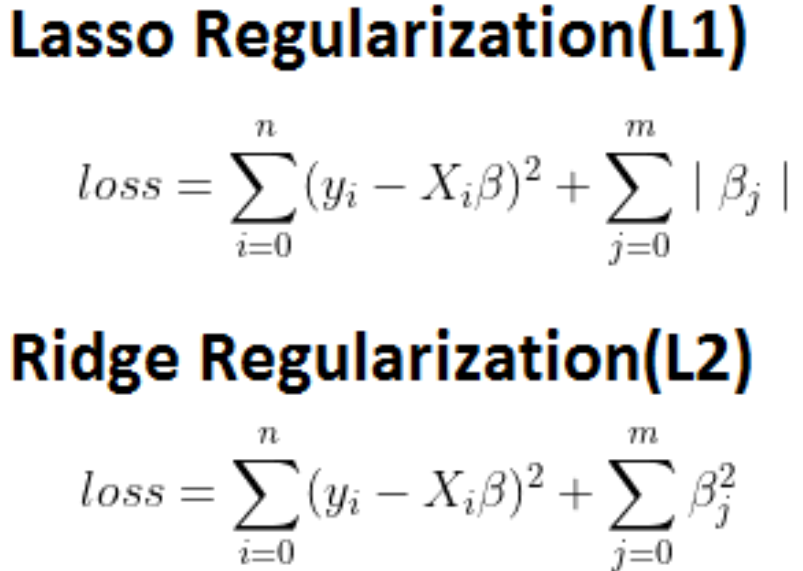|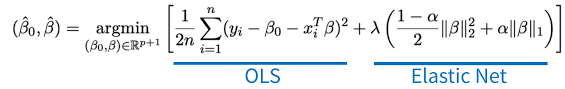|

>* `penality` is an important term accompained with regularization:
____________________________

>### Important Note about [**Ridge regression**](https://www.youtube.com/watch?v=Q81RR3yKn30)
> `Lasso-Regression` goes over `Ridge-Regression` in that: if lambda = 0, Lasso makes irrelevant parameters = 0 therefore eleminating their features but Ridge tries to approximate this to zero therefore the less important featuers still exist.
> `Elastic-net` regression combines the two.
___________________________


> ### Note:
>* Logistic Regression is by nature used for Binary-Classification problem with a loss function ==> `Log-Loss (Binary Cross-entropy)`
>* If we want to use the Logistic Regression for multiclassification tasks, we can use one of the two:
>>* `ovr` or `ovo` techniques that divide the multiclassification tasks into multiple binary-classification tasks.(each of those tasks uses the Log-loss as cost function)
>>* `multinomial` technique that makes the classification at once by changing the cost function into **(Cross-Entropy) instead of Log-loss.** 
____________________________

> The two arguments above are arguments for the parameter `multi_class` in the `LogisticRegression` model. 
### Take Care:
> Another parameter called `solver` works in-parallel with this `multi_class` parameter ... 
>> For example, if you you choose: **`multi_class = 'multinomial' `**, you cannot choose **`solver = 'liblinear' `** because the `liblinear` solver supports only Ordinary Binary Classification and ovr
>> 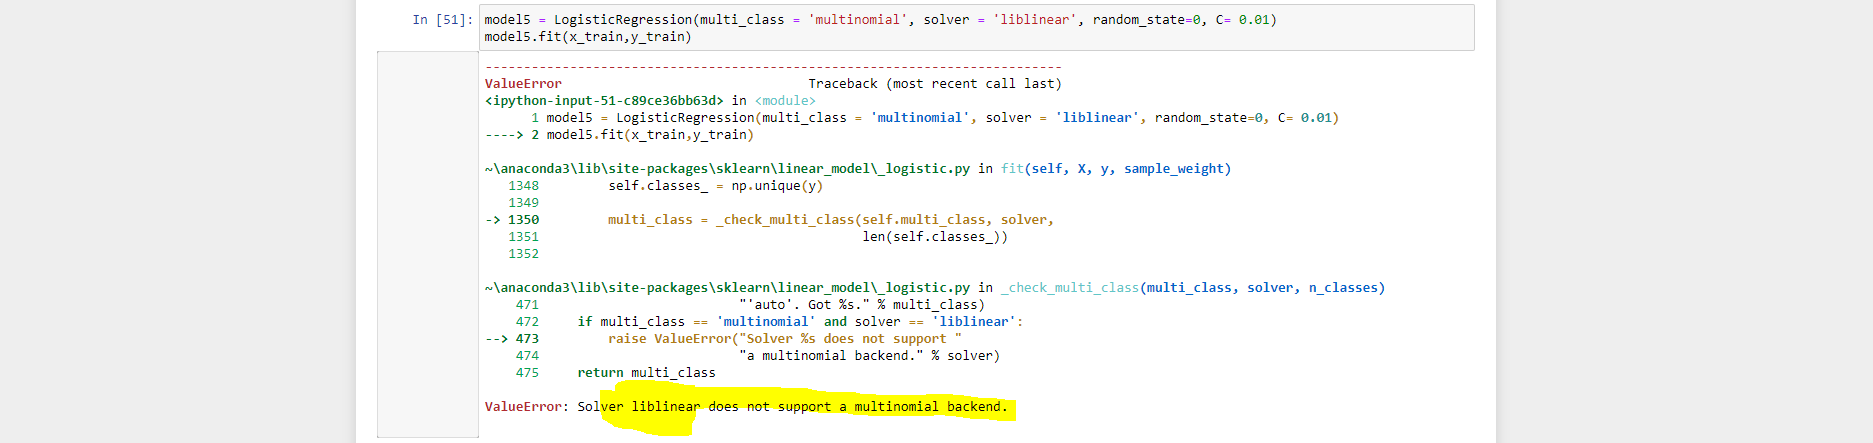

__________________________


> **`OVR "One-Vs-Rest"`** & **`OVO "One-Vs-One"`** trick for multi-class Classification:
>* Algorithm like `LogisticRegression`, `SVM` & `Perceptron` by nature used for binary classification.
>* If we perform a multi-class classification task, we can use the method of OVR or OVO with those algorithms.
> |A|B|
> |-|-|
> |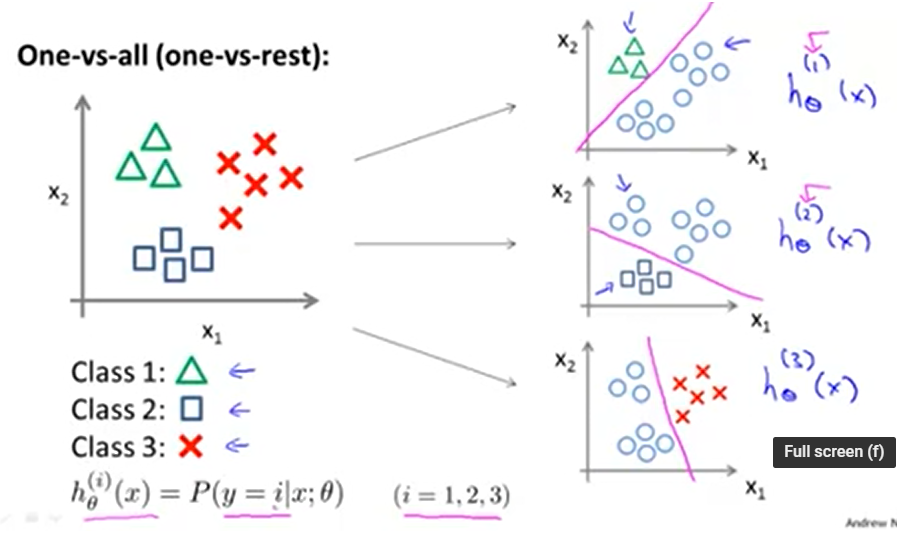 | 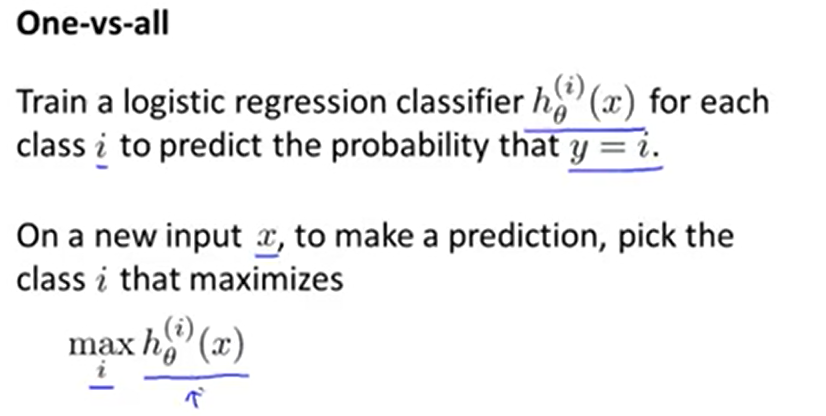
>*
>* [OVO One-Vs-One](https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/) **`n_models = (n)(n-1)/2`**
>* [OVR One-Vs-Rest](https://machinelearningmastery.com/one-vs-rest-and-one-vs-one-for-multi-class-classification/) **`n_models = n`**
>* The main advantage of OvO is that each classifier only needs to be trained on the part of the training set containing the two classes that it must distinguish.
______________________


> Unbalanced Data is a `Classification-Related` Problem, To solve them:
>* 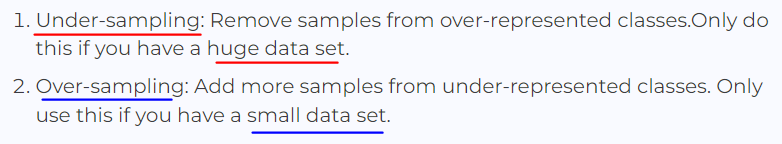
>*
>* Or you can **change your task from supervised classification to Unsupervised Anomaly detection** (if your task was binary classification)
>* I think OneVsOne may work by predict probaba and use the two columns not on only the probability of +ve class ... and then use the whole matrix to get the maximum probability allover them.


## Binary Classification Example:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
x = np.arange(10).reshape(-1,1)
y = np.append(np.zeros(4),np.ones(6))


In [3]:
model = LogisticRegression(solver='liblinear',random_state=0)


In [4]:
model.fit(x,y)

LogisticRegression(random_state=0, solver='liblinear')

In [5]:
model.classes_ , model.intercept_ , model.coef_ ,model.n_iter_



(array([0., 1.]),
 array([-1.04608067]),
 array([[0.51491375]]),
 array([6], dtype=int32))

In [6]:
model.predict(x)

array([0., 0., 0., 1., 1., 1., 1., 1., 1., 1.])

In [7]:
model.predict_proba(x)

array([[0.74002157, 0.25997843],
       [0.62975524, 0.37024476],
       [0.5040632 , 0.4959368 ],
       [0.37785549, 0.62214451],
       [0.26628093, 0.73371907],
       [0.17821501, 0.82178499],
       [0.11472079, 0.88527921],
       [0.07186982, 0.92813018],
       [0.04422513, 0.95577487],
       [0.02690569, 0.97309431]])

In [8]:
model.score(x,y)

0.9

### ❗ Note about accuracy metric in `Classification`:
> **Accuracy is not always the best metric for classification** because the number of correctly predicted / all instances.
>* Think if I the true labels I have are [0,0,0,0,0,0,0,1,1,1] and I made a model to output 0 as predicted value wether the input was. 
>* In this case, the accuracy will be 70% and this is so deceiptive and misleading result.
______________________________
>* How **sklearn.linear_model.LogisticRegression** adjust the threshold value of the simgoid: [**READ This**](https://stackoverflow.com/questions/28716241/controlling-the-threshold-in-logistic-regression-in-scikit-learn#:~:text=we%20can%20use,threshold%3D0.4) 

> Confusion Matrix Representation in Logistic_Regression Module:

> |A|B|
> |-|-|
> |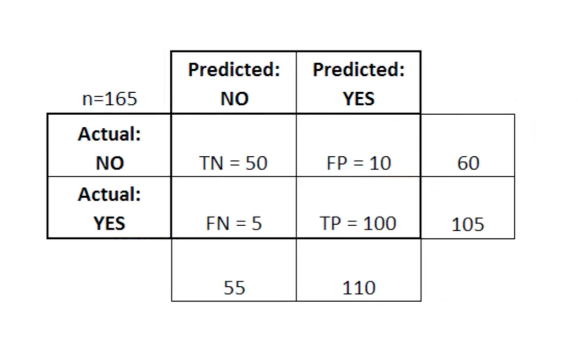 | 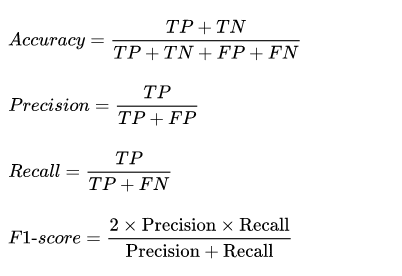

In [9]:
confusion_matrix(y, model.predict(x))

# up ==> down then left then up ==> down (NTF / PFT)

array([[3, 1],
       [0, 6]], dtype=int64)

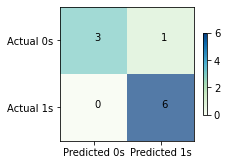

In [10]:
# Visualizing confusion matrix:
import matplotlib.pyplot as plt

cm = confusion_matrix(y,model.predict(x))

fig,ax = plt.subplots(1,1,figsize =(3,3))
c = ax.imshow(cm,cmap='GnBu', alpha = 0.7)
cp = ax.figure.colorbar(c, ax = ax, shrink=0.5) # set the guiding bar "something like the legend for the heatmap"

# ax.axis('off')  or ax.axis(False)

#ax.set_xlabel(("Predicted 0s","Predicted 1s"))    ==> this will label the axes but without order 
ax.xaxis.set(ticks = (0,1), ticklabels = ("Predicted 0s","Predicted 1s"))
ax.yaxis.set(ticks = (0,1), ticklabels = ("Actual 0s","Actual 1s"));

for i in range(2):
    for j in range(2):
        ax.text(i,j,s=cm[j,i])
plt.show();


In [11]:
# Classification report gives more details:

classification_report(y,model.predict(x)) 
print( classification_report(y,model.predict(x)) ,"\n", confusion_matrix(y,model.predict(x)) ) # use print for more apparent view 

# type(classification_report(y,model.predict(x)) )


              precision    recall  f1-score   support

         0.0       1.00      0.75      0.86         4
         1.0       0.86      1.00      0.92         6

    accuracy                           0.90        10
   macro avg       0.93      0.88      0.89        10
weighted avg       0.91      0.90      0.90        10
 
 [[3 1]
 [0 6]]


In [12]:
model2 = LogisticRegression(solver = 'liblinear',C = 10.0, random_state = 0)
model2.fit(x,y)

LogisticRegression(C=10.0, random_state=0, solver='liblinear')

In [13]:
model.score(x,y) , model2.score(x,y) , print(classification_report(y,model2.predict(x)))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         4
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



(0.9, 1.0, None)

> ### F1-score Note:
>* 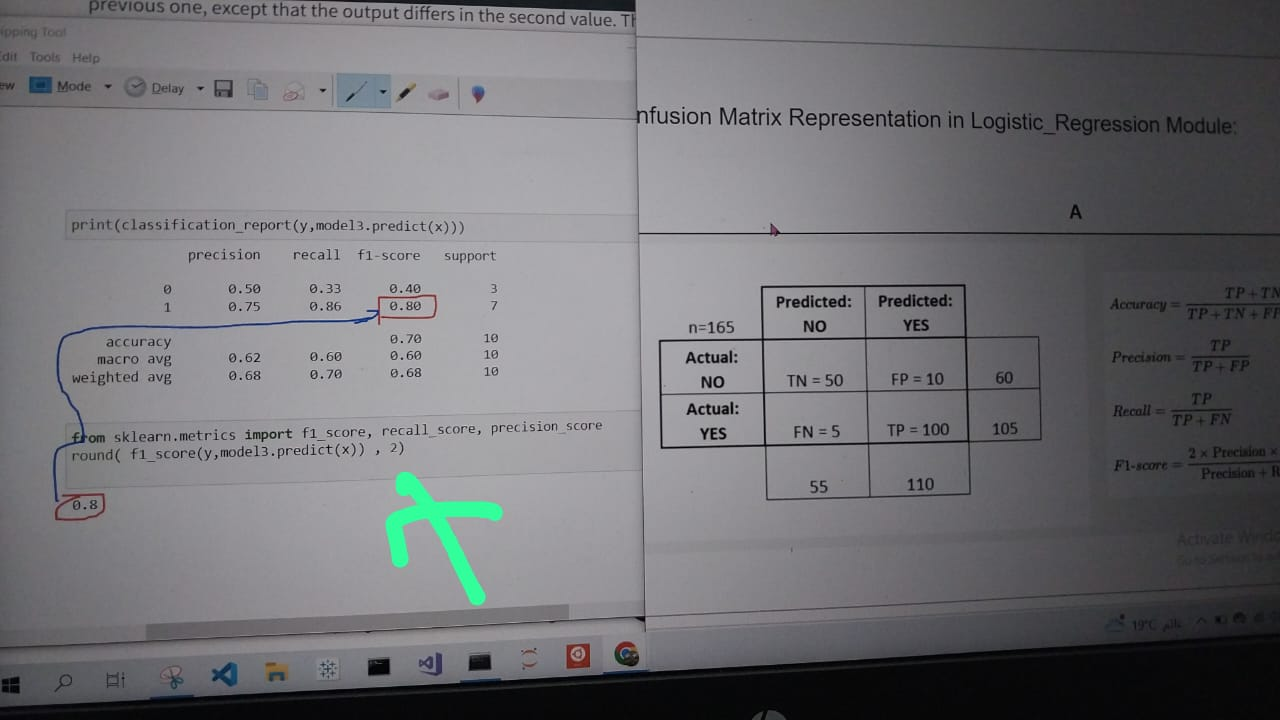
>* The two values appear for each class is reasonable:
>* Think if you have mutli-class Classification task, [**<font color = "red">How You can use F1-score here? </font>Click Here**](https://towardsdatascience.com/confusion-matrix-for-your-multi-class-machine-learning-model-ff9aa3bf7826)

## MutliClass Classification Example:

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix
from sklearn.datasets import load_digits

In [15]:
x,y = load_digits(return_X_y = True)

In [16]:
x.shape , y.shape


((1797, 64), (1797,))

In [17]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2 ,random_state = 2, stratify = y)  # this statify can be "True" or "y"

> ### Important Notes:
>* `x` fed into the `train_test_split` should be 2D ... but `y` can be 1D or 2D (and this affects the resulted `y_train`, `y_test`)
>* stratify can be **`stratify = True`** or **`stratify = y`**
>*
>* 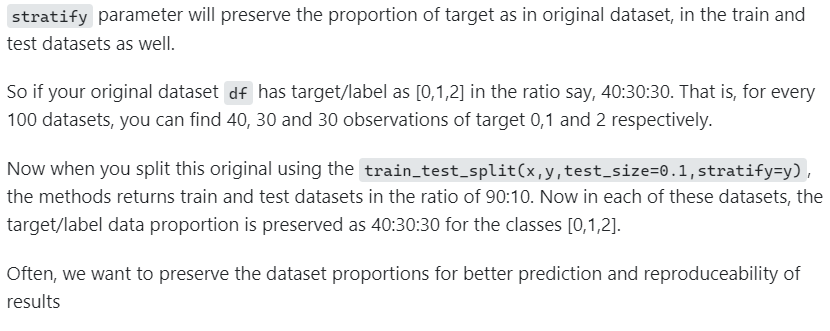


In [18]:
x_train.shape, x_test.shape, y_train.shape , y_test.shape 

((1437, 64), (360, 64), (1437,), (360,))

In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test)

>* **`scaler.fit(x_train)`** computes the mean and std to be used later ==> (returns a scaler object)
>* **`scaler.fit_transform(x_train)`** do fitting then transfrom x_train ==> (returns an x_train_standardized array)
>* **`scaler.transform(y_train)`** # transform the given array ==> (returns this transformed array whatever x_train or y_train)
>*
>* Therefore the following two lines are exact:
>>* **`scaler.fit(x_train)`** ==> **`scaler.transform(x_train)`**
>>* **`scaler.fit_transform(x_train)`**

In [20]:
model5 = LogisticRegression(multi_class = 'multinomial', solver = 'lbfgs', random_state=0, C= 0.01)
model5.fit(x_train,y_train)
print(classification_report(y_train , model5.predict(x_train)) )

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       142
           1       0.92      0.93      0.93       146
           2       0.99      0.99      0.99       142
           3       0.99      0.94      0.96       146
           4       0.99      0.97      0.98       145
           5       0.97      0.97      0.97       145
           6       0.99      0.97      0.98       145
           7       0.97      0.99      0.98       143
           8       0.91      0.91      0.91       139
           9       0.90      0.96      0.93       144

    accuracy                           0.96      1437
   macro avg       0.96      0.96      0.96      1437
weighted avg       0.96      0.96      0.96      1437



In [21]:
print(classification_report(y_test , model5.predict(x_test)) )

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        36
           1       0.89      0.94      0.92        36
           2       0.97      1.00      0.99        35
           3       1.00      0.89      0.94        37
           4       1.00      0.97      0.99        36
           5       0.90      0.95      0.92        37
           6       1.00      0.97      0.99        36
           7       0.97      1.00      0.99        36
           8       0.91      0.89      0.90        35
           9       0.89      0.92      0.90        36

    accuracy                           0.95       360
   macro avg       0.95      0.95      0.95       360
weighted avg       0.95      0.95      0.95       360



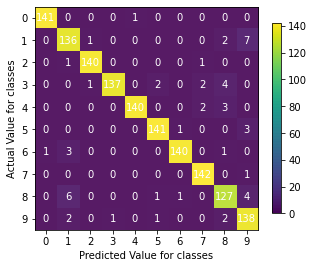

In [22]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
cm = confusion_matrix(y_train,model5.predict(x_train))

image = ax.imshow(cm,alpha = 0.9)
ax.figure.colorbar(image, ax =ax , shrink=0.7 )

ax.set_ylabel('Actual Value for classes')
ax.set_xlabel('Predicted Value for classes')
ax.set_xticks(range(10))
ax.set_yticks(range(10))

for i in range(10):
    for j in range(10):
        ax.text(i,j,s=cm[j,i], ha='center', va='center', color='white')
plt.show()       

___________________________________________________________________________

### Gradient Descent (AKA: Batch Gradient Descent) VS `Stochastic` Gradient Descent:[Click Here](https://www.youtube.com/watch?v=W9iWNJNFzQI)

> To update single parameter one update:
>>* In **`Gradient Descent`**, you take all the derivative for **all the examples** (calculate the gradient vector for all of them) and then take the average multiply it by the learning rate and update your parameter.
>>* In **`Stochastic Gradient Descent`**, you take the derivative for only **one instance** (after schuffling all the instances randomly), then update your parameter with this derivative after you multiply it with the learning rate.

>* Advantage: **`Stochastic Gradient Descent`** may be a better and faster solution if you have a large number of instances (say: 300 000 000 instance) ... To run Batch Gradient Descent,for each iteration, you need to reserve 300 000 000 space in memory... and for second iteration you need to update all of those by calculating the derivative for all of them again.

>* Disadvantage: Unlike Batch Gradient Descent, **`Stochastic Gradient Descent`** don't converge to the local minima but converges to area arround them ... but in practice, this is a small error. 

______________________________________________

> There another related technique called **`Mini-batch Gradient`** :
>> It is the same as **`Stochastic Gradient Descent`** but with batch size at a time instead of each instance at a time.
>>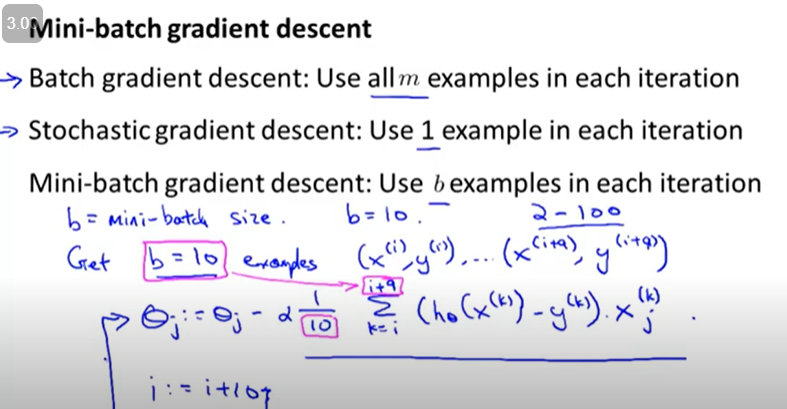
>>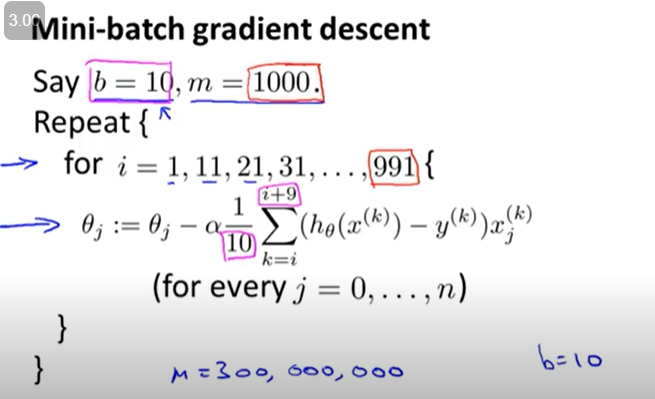
_________________________

# Chapter 3: 

_______________________________________________

**`sklearn.datasets`** has three methods:
> * fetch_* : as `fetch_openml()` --> to download real-life datasets.
> * load_* : --> to load data already exist in sklearn
> * make_* : --> to generate fake datasets

In [23]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',as_frame = False)

>* In the above, we used `as_frame = False` because datasets are loaded as NumPy arrays (X,y) input data and target 
>* But because `open_ml()` is unusual one as it returns datasets as DataFrame object & we want it as NumPy array so we specify: `as_frame = False`
>* `fetch_openml()` by default splitted your dataset into `train-test-split` as training (first 60,000 images) and testing (last 10,000 images):
>>* `X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]`

 



In [24]:
X,Y = mnist.data , mnist.target

In [25]:
X.shape , Y.shape

((70000, 784), (70000,))

>* X has this "784" features because:
>* each row in the X represents an image and 784  

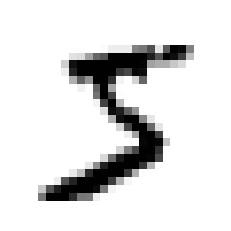

label of this image is: 0


In [26]:
import matplotlib.pyplot as plt

def plot_digit(image_data):
    image = image_data.reshape(28,28)
    plt.imshow(image,cmap = 'binary')
    plt.axis('off') #remove the frame and axes of the plot

some_digit = X[0]
plot_digit(some_digit)
plt.show();
print("label of this image is:" , y[0])

___________________________
`fetch_openml()` when creating the train-test split, they **schuffled the data**:

<font color = "red">**Benefits of schuffling the data:**</font>

* This guarantees that all cross-validation folds will be similar (we don’t want one fold to be missing some digits). I don't know if there is **`startify`** parameter here or not.

* This is helpful because if we don't schuffle, there may be similar rows of same label setted after each other "and some algorithms are sensitive to this order... therefore some misleading will occur"

>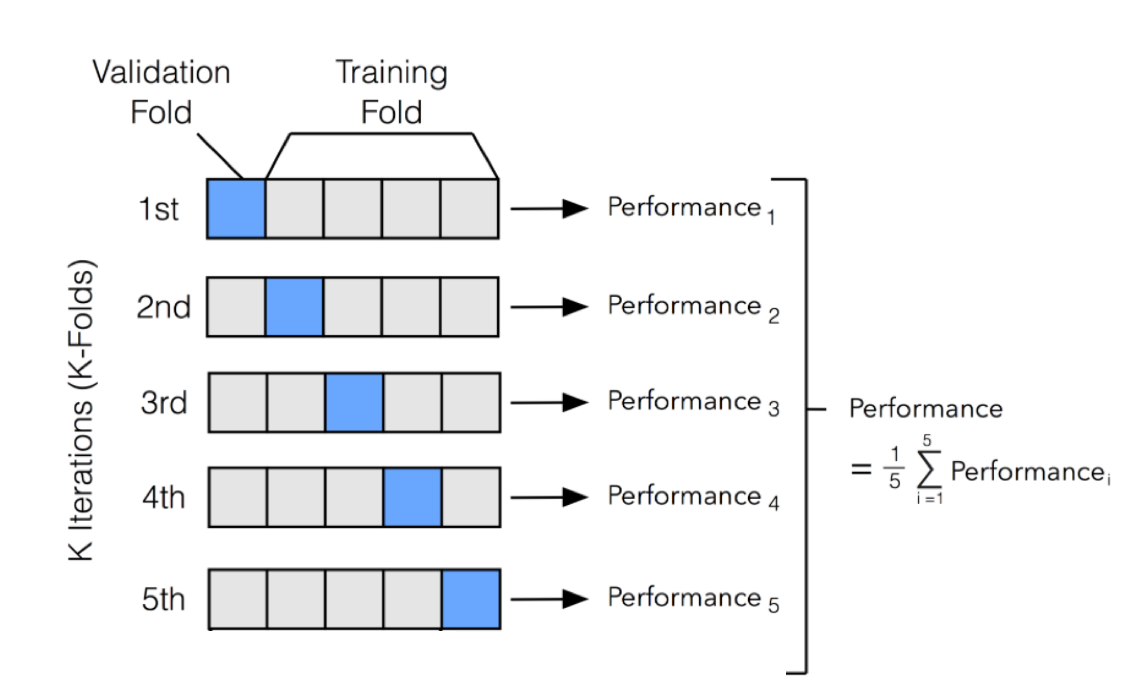

>* Important fleeting note about `cross-validaton`:
>> * It is used for either **hyperparameter tuning** ex: ridge-regression parmaters or **different model selection**
>> * The above image is called **`5-fold`** cross validation ... "we divide our set into 5-folds" ... if we divide our set into n folds (where n is the number of instances) ... This is called  **`leave-one-out`** cross validation. 
________________________

In [27]:
x_train, x_test, y_train, y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]

#### we will do some classification using `SGDClassifier`:
>* In fact, SochasticGradientDescent is a training algorithm "it is not an estimator" that helps in the process of training, but don't classify.
>* Strictly speaking, SGD is merely an optimization technique and does not correspond to a specific family of machine learning models.
>* It is only a way to train a model. Often, an instance of **SGDClassifier** or **SGDRegressor** will have an equivalent estimator in the scikit-learn API, potentially using a different optimization technique. For example, using `SGDClassifier(loss='log_loss')` results in **logistic regression**, *i.e. a model equivalent to LogisticRegression which is fitted via SGD instead of being fitted by one of the other solvers in LogisticRegression.* Similarly, `SGDRegressor(loss='squared_error', penalty='l2')` and Ridge solve the same optimization problem, via different means.
>* The model it fits can be
controlled with the loss parameter; by default, it fits a linear support
vector machine (SVM)

In [28]:
pd.Series(y_train).dtypes

dtype('O')

In [29]:
y_train_5 = (y_train == '5')  # True for all 5s, False for all other digits
y_test_5 = (y_test == '5') # we wrote '5' instead of 5 (thanks to the datatype)

In [30]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state = 42) # this by default runs SVM
sgd_clf.fit(x_train, y_train_5)

SGDClassifier(random_state=42)

In [31]:
sgd_clf.predict(x_train[0].reshape(1,-1)) , y_train_5[0]

(array([ True]), True)

_________________________
We now evaluate the model:

>* Evaluating a `classifier` is often significantly trickier than evaluating a `regressor`.

In [32]:
sgd_clf.score(x_train,y_train_5)

0.9522666666666667

In [33]:
# High train accuracy may be tricky as it may be good model or may be an overfitting:
# Therefore we do cross validation

from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, x_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [34]:
# the following is how to create a customized cross_validtion (if you want further edit it in more advanced way than sklearn do)

from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)  # add shuffle=True if the dataset is
                                       # not already shuffled
    
for train_index, test_index in skfolds.split(x_train, y_train_5): #Generate indices to split data into training and test set.
    clone_clf = clone(sgd_clf)
    
    x_train_folds = x_train[train_index]
    y_train_folds = y_train_5[train_index]
    x_test_fold = x_train[test_index]
    y_test_fold = y_train_5[test_index]

    clone_clf.fit(x_train_folds, y_train_folds)
    y_pred = clone_clf.predict(x_test_fold)
    n_correct = sum(y_pred == y_test_fold)
    print(n_correct / len(y_pred))  # prints 0.95035, 0.96035, and 0.9604

0.95035
0.96035
0.9604


> From the above, we have high accuracy on train and high on test, Therefore no overfitting occur.
>* But <font color = 'red'>**TAKE CARE**</font> The task is classification and therefore the accuracy is a tricky metric to use. It may be misleading:
>* If you make a dummy model that predict (the most frequent class in the column which in 'y_train_5' the class of (not_5)) this model will give a high accuracy even logically it doesn't fo nothing... it always predict not_5.

In [35]:
from sklearn.dummy import DummyClassifier

dummy_clf = DummyClassifier()
dummy_clf.fit(x_train, y_train_5)
print(any(dummy_clf.predict(x_train)))  # prints False: no 5s detected"False" as value.

False


In [36]:
cross_val_score(dummy_clf, x_train, y_train_5, cv=3, scoring= 'accuracy')

array([0.90965, 0.90965, 0.90965])

In [37]:
# the above value is reasonable as the percentage of not-5 to the 5 in y_train_5 = 0.90965

print( "% of 5", np.sum(y_train_5) / len(y_train_5) ) 
print( "% of not_5", 1- ( np.sum(y_train_5) / len(y_train_5) ) ) 


% of 5 0.09035
% of not_5 0.90965


> Therefore we should search another precise & non_misleading metric like **confusion matrix**.

In [38]:
from sklearn.model_selection import cross_val_predict

y_train_pred1 = cross_val_predict(sgd_clf, x_train, y_train_5, cv=3)
y_train_pred2 = sgd_clf.predict(x_train)
 

In [39]:
#method = 'decision_function')
y_train_pred1[:5] , y_train_pred2[:5]


(array([ True, False, False, False, False]),
 array([ True, False, False, False, False]))

>* Difference between `cross_val_score()` & `cross_val_predict()` is [here](https://stackoverflow.com/questions/43613443/difference-between-cross-val-score-and-cross-val-predict#:~:text=cross_val_score%20returns%20score%20of%20test,error%20(not%20fit%20correctly).)
>* The `cross_val_score()` returns the score of each

In [40]:
sum(sgd_clf.predict(x_train) == y_train_pred1) / len(y_train_pred1)

0.9391

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_train_5,y_train_pred1)
cm

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

_________________________________
#### Important Note:
>* we have three metrics: There is a threshold set to divide them:
>>* **Precision** (of all that classified as True, how many of them are actually True)
>>* **Recall** (of all that actually True, how many of them are classified as True)
>>* **F1_score** (the harmonic mean of the precision & recall) ... harmonic mean gives high weight to small values.
>> 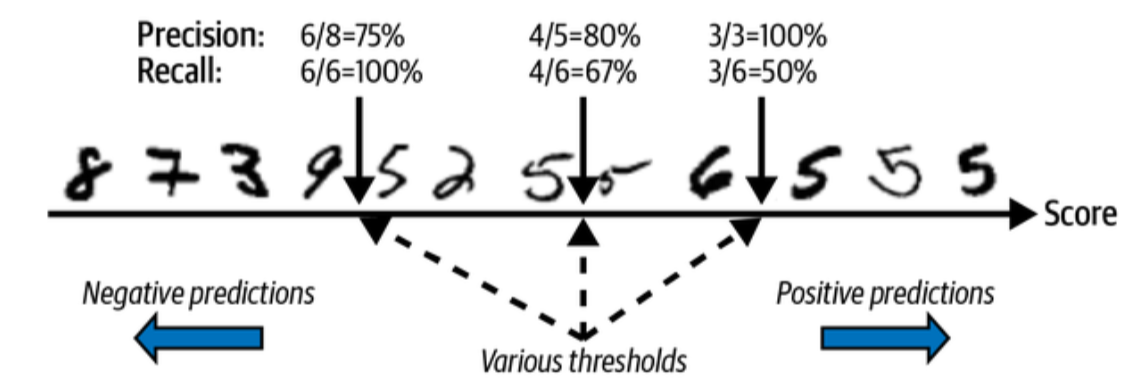
#### Percision/Recall Trade off:
>* As you increase Precion, you decrease recall and vice versa. Sometimes, you need only high precision and in other appliactions you need higher recall and for general applications you want both of them.
>>* Ex: if you want an application that classify whether the videos are safe for children. **In this case you consider `high precision even if our recall was too low` "we set our threshold to classify as True as it could True Safe videos even if not pay attention to all safe ones {this reduces recall}...but what it is classified as True .. it is actually True"**
>>* Ex: if you want an application to mark any shoflifter,**In this case we want to have `high recall even our precision is too low` "we set our threshold so that it pay attention to all shoflefters even if it classifies some not-shoplifter as shoplifter {this will reduce precision} but we pay attention to any shoplifter"** 
__________________________________

In [42]:
# To set such this threshold, you should know the scores of each instance instead of predictions ... to do this, we use:
# .decision_function() instead of .predict()

y_scores = sgd_clf.decision_function([x_train[0]])
print( y_scores ) 
threshold = 0
y_some_digit_pred = (y_scores > threshold)
print("with threshold 0:", y_some_digit_pred)


###### try raising the threshold:

threshold = 3000
y_some_digit_pred = (y_scores > threshold)
print("with threshold 3000:", y_some_digit_pred)


#### This confirms that raising the threshold decreases recall. 

[2164.22030239]
with threshold 0: [ True]
with threshold 3000: [False]


#### Decision function:
> The decision function is a representation of how the algorithm makes a classification decision. That decision function depends on the kind of algorithm being used. **But for a support vector classifier (which is our current SGDClassifier)**, the function values are proportional to the distance between the data point and the separating hyperplane

In [43]:
from sklearn.metrics import precision_recall_curve

y_scores = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3, method = 'decision_function') 

# the estimator here "sgd_clf" do .fit() at first and then invocke the specified method to do .predict()

precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

In [44]:
thresholds.shape , y_train_5.shape

((59966,), (60000,))

In [45]:
print( max(thresholds) , min(thresholds)  )
print( max(y_scores) , min(y_scores)  )

49441.43765904775 -106527.45300471177
49441.43765904775 -146348.56726173856


>* For the above method, we calculate the precision and recall for one time ... then adjust the threshold and recaclulate the precision and recall ... (until recall reaches 0 & precision reaches 1) ... 
>* The range of `precision` goes from class balance ==> 1
>* The range of `recall` goes from 1 ==> 0
>* the range of the applied threshold goes from min_scores to max_scores (مش متأكد أوى)

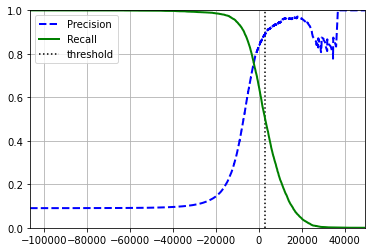

In [46]:
plt.plot(thresholds, precisions[:-1], "b--", label="Precision", linewidth=2)
plt.plot(thresholds, recalls[:-1], "g-", label="Recall", linewidth=2)

# [:-1] here because the precision values and recall values are greater than thresolds by 1

plt.vlines(3000, 0, 1.0, "k", "dotted", label="threshold") # this to show our previously chosen threshold of 3000 (it seems bad choice)
plt.grid()
plt.legend() 
plt.xlim([min(thresholds),max(thresholds)])
plt.ylim(0,1)
plt.show()

#### Another way to select a **good precision/recall trade-off** is to plot `precision` directly against `recall`.

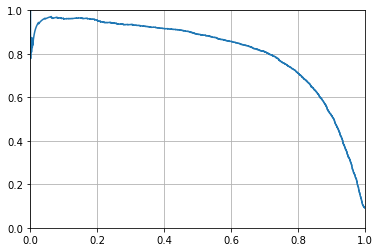

In [47]:
plt.plot(recalls , precisions)
plt.grid()
plt.ylim(0,1)
plt.xlim(0,1);


#### The above two curves are important together:

>* Because when the recall increased than 0.8, the precision starts a steep decrease. Therefore, you will probably want to select a precision/recall trade-off just before that drop—for example, at around 60% recall.( which is the point of intersection of the first plot against thresholds)
>* **But of course, the choice depends on your project.** (As it is mentioned earlier)
_____________________
>* Suppose you decide to aim for 90% precision **(This value of precision is not general it is an example...sometimes you need different value)**:
>>* You could use the first plot to find the threshold you need to use. 
>>* or more precisely, use the numpy `argmax()`. This returns the first index of the maximum value, which in this case means the first True value.

In [48]:
desired_threshold_idx = np.argmax( (precisions > 0.9) )
desired_threshold_90_precision = thresholds[desired_threshold_idx]
desired_threshold_90_precision

3370.0194991439557

> Now we extracted our desired threshold, intead of using `cross_val_predict()` we could use:
>* **`y_train_pred_90 = (y_scores >= desired_threshold_90_precision)`** 
>> (because we cannot set a thresold in the above `cross_val_predict()`)

In [49]:
y_train_pred_90_precision = (y_scores >= desired_threshold_90_precision)

# this will give us our desired values

from sklearn.metrics import f1_score, recall_score, precision_score

precision_score(y_train_5 , y_train_pred_90_precision)  , recall_score(y_train_5 , y_train_pred_90_precision)

# But wait, not so fast–a high-precision classifier is not very useful if its recall is too low! 
# For many applications, 48% recall wouldn’t be great at all.(what determines you is the goal of your task).

(0.9000345901072293, 0.4799852425751706)

#### If someone says, “Let’s reach 99% precision”, you should ask, “At what recall?”
______________________

#### ROC & ROC AUC "Area Under Curve":

>* **"receiver operating characteristic" ROC curve** is another tool we use in binary classification.
>* It is similar to **Percision/Recall curve** but instead plots the `true positive rate (TPR)` (another name for recall) against the `false positive rate (FPR)` ... (FPR = 1 - TNR = 1 - specifity)

In [50]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

# "tpr" = recalls.

> Since thresholds for the `roc_curve()` are listed in decreasing order in this case, we use <= instead of >= on the first line

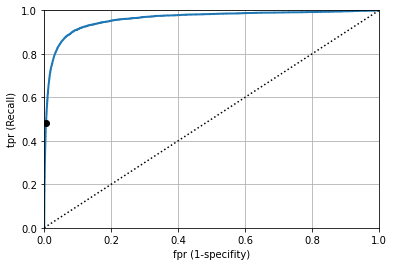

In [51]:
idx_for_threshold_at_90 = (thresholds <= desired_threshold_90_precision).argmax()
tpr_90 , fpr_90 = tpr[idx_for_threshold_at_90], fpr[idx_for_threshold_at_90]

plt.plot(fpr, tpr, linewidth=2, label="ROC curve")
plt.plot([0, 1], [0, 1], 'k:', label="Random classifier's ROC curve")
plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision");
plt.grid()
plt.xlabel("fpr (1-specifity)")
plt.ylabel("tpr (Recall)")
plt.xlim(0,1)
plt.ylim(0,1);

>* Once again there is a trade-off: the higher the recall (TPR), the more false positives (FPR) the classifier produces. 
>* The dotted line represents the ROC curve of a purely random classifier; 
>* A good classifier stays as far away from that line as possible (toward the top-left corner).

>>* **One way to compare classifiers** is to measure the area under the curve (AUC).
>>* A perfect classifier will have a ROC AUC equal to 1. 
>>* Whereas a purely random classifier will have a ROC AUC equal to 0.5

In [52]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

#### Rule of thumb to choose whether `ROC` or `Percision/Recall`:

> As a rule of thumb, you should prefer the **PR curve** whenever:
>>* 1. The positive class is rare.
>>* 2. Or when you care more about the false positives than the false negatives.
>>* **Otherwise, use the ROC curve.**

> Illustration about this misleading effect:
>>* looking at the previous ROC curve (and the ROC AUC score), you may think that the classifier is really good. But this is mostly because there are few positives (5s) compared to the negatives (non-5s).
>>* In contrast, the PR curve makes it clear that the classifier has room for improvement: the curve could really be closer to the top-right corner.
_________________________

###### Because of the low evaluation of the previous model, we have two solutions:

>* Either use the oversampling or undersampling for the classes.
>* Try another model than the `SGDClassifier`

In [53]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3,
                                    method="predict_proba")

# unlike the SGDClassifier, the RandomForestClassifier doesn't have decision function
# Instead, to have values set the threshold upon, we use the method = predict_probability


In [54]:
y_probas_forest[:2]

array([[0.11, 0.89],
       [0.99, 0.01]])

> The above model predicts that 11% the number is not_5 & 89% the number is 5. (sum of probabilies for each instance = 1)

In [55]:
y_scores_forest = y_probas_forest[: , 1]
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(y_train_5 , y_scores_forest)

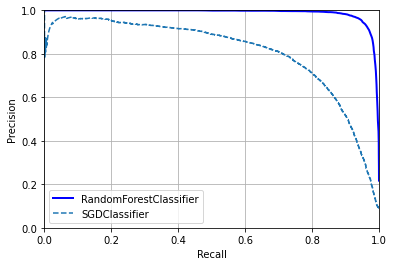

In [56]:
plt.plot(recalls_forest, precisions_forest, "b-", linewidth=2,
         label="RandomForestClassifier")
plt.plot(recalls,precisions, '--',label = "SGDClassifier")

plt.grid()
plt.legend()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Recall')
plt.ylabel('Precision');

> In our example, if we want to compare the two models (SGDClassifier, RandomForestClassifier):
>* It is wiser to use P/R curve not ROC curve (because the percentage of +ve class is so tiny compared to -ve class)
>* Otherwise, you should do undersampling or oversampling (depending on the size of the dataset)

> It is apparant that the RandomForest is better because the P/R curve is less steep means (increasing either of Recall or Precision, increases decreases the other by little amount. Unlike steep curve of SGDClassifier that makes increasing one of them, decrease the other by large amount)

> <font color ='red'>**Important Note**</font> In addition to P/R curve, try to plot the P&R against thresholds (like the earlier plot) to know the threshold ... or know the threshold using the code like the above after you determined certain accuracy.


In [57]:
# also the f1-score and roc auc for RandomForest will be greater than for the previous SGDClassifier:
y_train_pred_forest = y_probas_forest[:, 1] >= 0.5  # positive proba ≥ 50%
f1_score(y_train_5, y_train_pred_forest)
# 0.9242275142688446
roc_auc_score(y_train_5, y_train_pred_forest)
0.9983436731328145

0.9983436731328145

# MultiClass classification (Multi-nomial classification):
> Predicting many classes instead of only two
>>* Some Scikit-Learn classifiers (e.g., LogisticRegression, RandomForestClassifier, and GaussianNB) are capable of handling multiple classes natively. Others are strictly binary classifiers (e.g., SGDClassifier and SVC). 
>>* However, there are various strategies that you can use to perform multiclass classification with multiple binary classifiers. like **`ovo`** with **[N * (N-1)]/2 classifiers** or **`ovr`** with **N classifiers**.
>>>* The main advantage of OvO is that each classifier only needs to be trained on the part of the training set containing the two classes that it must distinguish.
>>>* Some algorithms (such as support vector machine classifiers) scale poorly with the size of the training set. For these algorithms **OvO is preferred because it is faster to train many classifiers on small training sets than to train few classifiers on large training sets**.
>* Some algorithms (**such as support vector machine classifiers**) scale poorly with the size of the training set. Therefore it implements *ovo classification* for multinomial as default.
>* For **most binary classification algorithms**, however, *OvR is preferred*.

In [60]:
from sklearn.svm import SVC

svm_clf = SVC(random_state=42)
svm_clf.fit(x_train[:2000], y_train[:2000])  # y_train, not y_train_5 (becuase now we do multiclass classification not binary)
 
# we did on only the 2000 instances because of the time (only to explain the idea) and because svm works efficiently with small data.

SVC(random_state=42)

In [61]:
svm_clf.predict([some_digit])

# This code actually made 45 predictions—one per pair of classes—and it selected the class that won the most duels.
# If you call the decision_function() method, you will see that it returns 10 scores per instance: one per class.

array(['5'], dtype=object)

In [73]:
some_digit_scores = svm_clf.decision_function([some_digit]).round(2) 
class_id = some_digit_scores.argmax()

print(some_digit_scores)
print(svm_clf.classes_)
print(svm_clf.classes_[class_id])

[[ 3.79  0.73  6.06  8.3  -0.29  9.3   1.75  2.77  7.21  4.82]]
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9']
5


> if you want to force SVC to run either OVO or OVR:

In [69]:
from sklearn.multiclass import OneVsRestClassifier
ovr_clf = OneVsRestClassifier(SVC(random_state=42))
ovr_clf.fit(x_train[:2000],y_train[:2000])

# here the 2000 instances is used in the escense of time. (for clarification only not technical issue).

OneVsRestClassifier(estimator=SVC(random_state=42))

In [74]:
print( ovr_clf.predict([some_digit]) )
print( ovr_clf.estimators_ , len(ovr_clf.estimators_)) # number of run classifiers (in ovo it should be 45)

['5']
[SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42), SVC(random_state=42)] 10


In [78]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier( SVC(random_state = 42) ) # SVC is the estimtor, we pass to apply ovo with.
ovo_clf.fit(x_train[:2000] , y_train[:2000])

OneVsOneClassifier(estimator=SVC(random_state=42))

In [82]:
len(ovo_clf.estimators_) # ovr had only 10 but ovo has 45

45

_____________________________________

In [88]:
# we should run all x_train, y_train
'''
cross_val_score(svm_clf,x_train,y_train,cv =3 , scoring ='accuracy')
cross_val_score(sgd_clf, x_train, y_train , cv=3 , scoring ='accuracy')
croos_val_score(forest_clf, x_train, y_train, cv=3, scoring = 'accuracy')
''';

#### Important Note:
>* Here, we could use `accuracy` as metric and it will be true instead of confusion matrix, precision, recall and so on ... **(this is because our label column is balanced with approximately same number of classes in the column) unlike the binary classification example of 5 and not 5)** but <font color='red'>**we can do them if we need further error analysis.**</font>
>* When we used `accuracy`, we didn't need precision,recall therefore we don't use `predict_proba` or `decision_function` ... we didn't use `cross_val_predict()` ... we used `cross_val_score()` instead.
>* **Random_forest and SVMClassifier are trained slowly** ... but as the book did, it was found that SGDClassifier is best here but its validation_score is can be improved:
`array([0.87365, 0.85835, 0.8689 ])`

#### Therefore, we should do our error analysis to improve this
__________________________

In [90]:
# we can do scaling of features for better results ... also if it was real project
# we could do pipeline for the easiness.

from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled_x_train = scaler.fit_transform( x_train.astype('float64') ) # because the data was string 

cross_val_score(sgd_clf, scaled_x_train,y_train, cv=3, scoring = 'accuracy')

# score is raised from:
#   array([0.87365, 0.85835, 0.8689 ])  ==>  array([0.8983, 0.891 , 0.9018])

array([0.8983, 0.891 , 0.9018])

## Error analysis steps: (Look at the confusion matrix image)

>* you should use `GridSearch` or `RandomizedSearch` or `LazyPredict` to decide on the best model with best hyperparametrs. But we will assume that you have found a promising model and you want to find ways to improve it:
>>* 1. look at the confusion matrix. For this, you first need to make predictions using the `cross_val_predict()` function **this to enable you to use the cross_validation and benefit from testing on validation set ... this can be done only with trainning on train, then do prediction , but cross_validation is more correct methodology**
>>* 2. when we plot the matrix, we noticed that:
>>>* most of the numbers are in the diagonal (which means most images classified correctly)
>>>* row-5 & col-5 cell looks a bit darker, this may indicate that:
>>>>* Either the model has a problem classified 5 wrong.
>>>>* Or there is small number of 5 instances in the training.
>>>* To handle this, we normlize the matrix by dividing each cell by the total number of images.
>>* 3. Now we can easily see that only 82% of the images of 5s were classified correctly. The most common error the model made with images of 5s was to misclassify them as 8s: this happened for 10% of all 5s. But only 2% of 8s got misclassified as 5s; confusion matrices are generally not symmetrical! If you look carefully, you will notice that many digits have been misclassified as 8s, but this is not immediately obvious from this diagram. If you want to make the errors stand out more, you can try putting zero weight on the correct predictions.
>>* 4. Now you can see much more clearly the kinds of errors the classifier makes. The column for class 8 is now really bright, which confirms that many images got misclassified as 8s. In fact this is the most common misclassification for almost all classes. But be careful how you interpret the percentages in this diagram: remember that we’ve excluded the correct predictions. For example, the 36% in row #7, column #9 does not mean that 36% of all images of 7s were misclassified as 9s. It means that 36% of the errors the model made on images of 7s were misclassifications as 9s. In reality, only 3% of images of 7s were misclassified as 9s, as you can see in the diagram on the right.
>>* 5. It is also possible to normalize the confusion matrix by column rather than by row: if you set `normalize="pred"`, you get the diagram on the right in Figure 3-10. For example, you can see that 56% of misclassified 7s are actually 9s.
>>* 6. Analyzing the confusion matrix often gives you insights into ways to improve your classifier. Looking at these plots, it seems that your efforts should be spent on reducing the false 8s.
>>>* For example, you could try to gather more training data for digits that look like 8s (but are not) so that the classifier can learn to distinguish them from real 8s.
>>>* Or you could engineer new features that would help the classifier—for example, writing an algorithm to count the number of closed loops (e.g., 8 has two, 6 has one, 5 has none).
>>>* Or you could **preprocess the images** (e.g., using Scikit-Image, Pillow, or OpenCV) to make some patterns, such as closed loops, stand out more.
>>>* Or use neural netowrks or do some data agumentation like rotating and shifting pixels because linear model just set weight to each pixel and some the weights to do classification ... but if the image rotated or shifter it will be hard.
>>* 7. You can also analysize individial errors together like why 5 is misclassified as 3 ..etc.
>>>|A|B|
|-|-|
|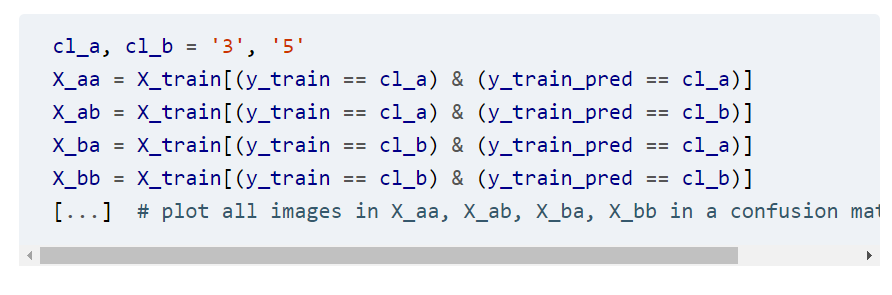|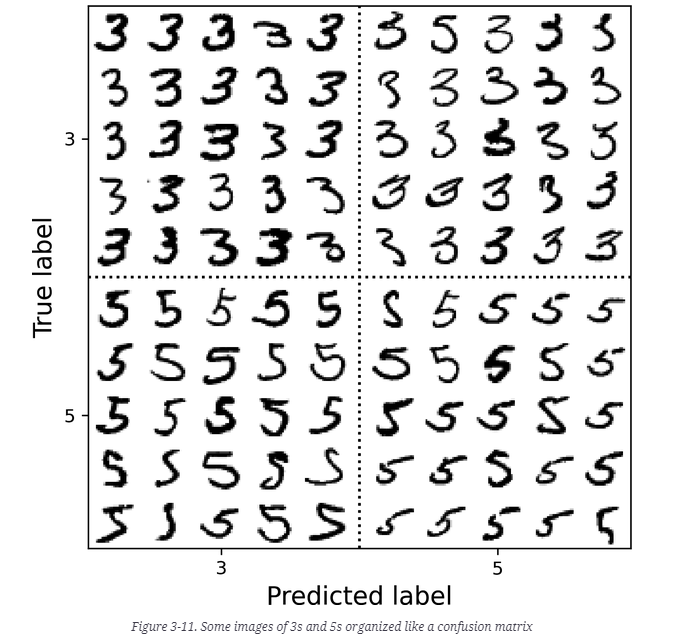|

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
y_train_pred = cross_val_predict(sgd_clf, scaled_x_train, y_train, cv=3)


In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
'''
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred, normalize = "true", values_format=".0%" )
'''

# `ConfusionMatrixDisplay` has some implemnetation method but this will be its output


# After setting all diagonals to zero to show the % of errors only not the % of data

'''
sample_weight = (y_train_pred != y_train) 
# or to make a np.diagonal(confusion_matrix, zero)
ConfusionMatrixDisplay.from_predictions(y_train, y_train_pred,
                                        sample_weight=sample_weight,
                                        normalize="true", values_format=".0%")
'''


|A|B|
|-|-|
|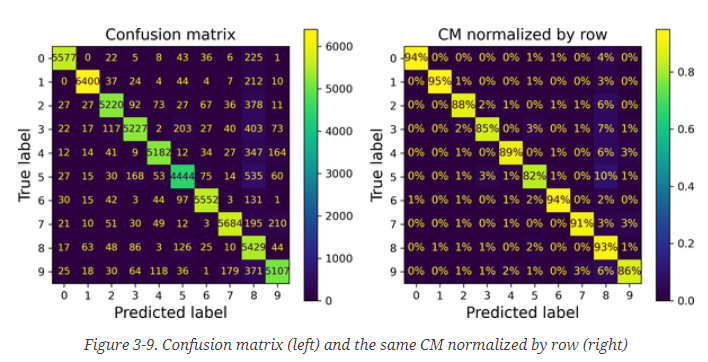|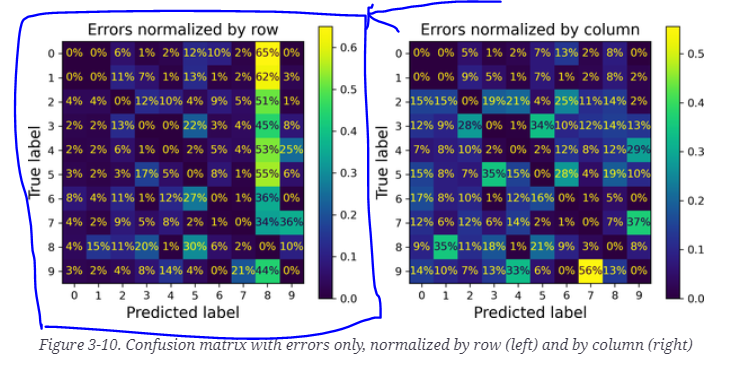|

> As you can see, some of the digits that the classifier gets wrong (i.e., in the bottom-left and top-right blocks) are so badly written that even a human would have trouble classifying them. However, most misclassified images seem like obvious errors to us. It may be hard to understand why the classifier made the mistakes it did, but remember that the human brain is a fantastic pattern recognition system, and our visual system does a lot of complex preprocessing before any information even reaches our consciousness. So, the fact that this task feels simple does not mean that it is. Recall that we used a simple `SGDClassifier`, which is **just a linear model**: **all it does is assign a weight per class to each pixel, and when it sees a new image it just sums up the weighted pixel intensities to get a score for each class. Since 3s and 5s differ by only a few pixels, this model will easily confuse them.**

>The main difference between 3s and 5s is the position of the small line that joins the top line to the bottom arc. If you draw a 3 with the junction slightly shifted to the left, the classifier might classify it as a 5, and vice versa. In other words, this classifier is quite sensitive to image shifting and rotation. One way to reduce the 3/5 confusion is to preprocess the images to ensure that they are well centered and not too rotated. However, this may not be easy since it requires predicting the correct rotation of each image. A much simpler approach consists of augmenting the training set with slightly shifted and rotated variants of the training images. This will force the model to learn to be more tolerant to such variations. This is called **data augmentation** (we’ll cover this in Chapter 14; also see exercise 2 at the end of this chapter).
________________________________________________

## Multilabel Classification:
>* It is for ex: when you are given an image and want to show if Omar exists or not, Ahmed exists or not and Khaed exists or not.
>* In this case, your classifier (model) will output: `[True, False, True]` means Omar & Khaled exist but Ahmed not.
>* In ordinary classification, you have to show if Ahmed exist or not ... or in other example if All of  Ahmed, Khaled, Omar exist or not.
>* In this case, your classifier (model) will output: `[True]` means they are all exist or `[False]` means they aren't exist.

In [104]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier

y_train_large = (y_train >= '7')
y_train_odd = (y_train.astype('int8') % 2 == 1)
y_multilabel = np.c_[y_train_large, y_train_odd] # concatenate to make two column as one label-column

knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train, y_multilabel)


knn_clf.predict([some_digit]) # prediction says that 5 is not greater than 7 & 5 is odd

# some_digit = X[0] ==> which is a matrix of 374 pixels indicate the image of 5

array([[False,  True]])

In [107]:
# to evaluate you could calculate the F1-score (read about the macro-micro-wighted) F1scores:

# There are many ways to evaluate a multilabel classifier, and selecting the right metric really depends on your project. 
# One approach is to measure the F1 score for eachindividual label (or any other binary classifier metric discussed earlier),
# then simply compute the average score.

y_train_knn_pred = cross_val_predict(knn_clf, x_train, y_multilabel, cv=3) # we don't specify (method = ) here
f1_score(y_multilabel, y_train_knn_pred,average = 'weighted')


0.9778357403921755

##### NOTE:
>* `KNeighborsClassifier` supports multilabel classification, other classifiers as SVC doesn't support this, **therefore we chain multiple models** (one for each label). The first model gives output and the successive model is fed with the input as will as this previous output to give its own ouput and the chain completes.
>* In sckitLearn, we use `ClassifierChain` to do this:

In [110]:
from sklearn.multioutput import ClassifierChain

chain_clf = ClassifierChain(SVC(), cv=3, random_state=42)
chain_clf.fit(x_train[:2000], y_multilabel[:2000])

ClassifierChain(base_estimator=SVC(), cv=3, random_state=42)

In [112]:
chain_clf.predict([some_digit]) # digit 5 is not > 7 & digit 5 is odd

array([[0., 1.]])

## Multioutput Classification:


>* It is called multioutput–multiclass classification (or just multioutput classification). 
>* It is a generalization of multilabel classification where each label can be multiclass (i.e., it can have more than two possible values).
>* To illustrate this, let’s build a system that removes noise from images. It will take as input a noisy digit image, and it will (hopefully) output a clean digit image.
>* 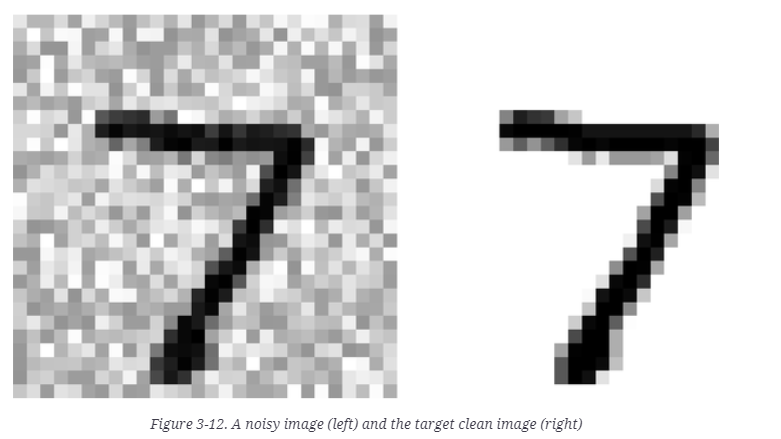

>* In the previous **`dicussed multilabel`**, **each label in the multi-label is binary either True or False** ... the difference in **`multioutput`** is that now we have each label of the multi-labeled has many values not binary. like we have multi-labels of multiple pixels ... each label "pixel" can take many intensity values (it is a bit regression).

In [114]:
np.random.seed(42)  # to make this code example reproducible
noise = np.random.randint(0, 100, (len(x_train), 784))
x_train_mod = x_train + noise
noise = np.random.randint(0, 100, (len(x_test), 784)) # to create random values other than for the train
x_test_mod = x_test + noise
y_train_mod = x_train
y_test_mod = x_test

#### NOTE:
here we do Snooping to the test-set and this is wrong, we formulate it with our desired values. (I'm not sure about the meaning of snooping) 

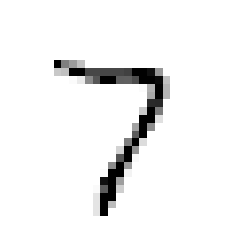

In [116]:
knn_clf = KNeighborsClassifier()
knn_clf.fit(x_train_mod, y_train_mod)
clean_digit = knn_clf.predict([x_test_mod[0]])
plot_digit(clean_digit)
plt.show()

# THE END :)

We now know how to:
* select good metrics for classification tasks
* pick the appropriate precision/recall trade-off
* compare classifiers, and more generally build good classification systems for a variety of tasks. 
* In the next chapters, you’ll learn how all these machine learning models you’ve been using actually work.
________________________